In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("/content/drive/MyDrive/capstone project data/Beauty dataset/Beautyy.csv")
data.head(3)

,Product_id,description,title,imUrl,salesRank,categories,price,related,brand,reviewerID,...,reviewTime,sentiment,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count
0,B001HSXTU2,Revlon Calcium Gel Nail Hardener instantly bon...,"Revlon Calcium Gel Nail Hardener, 0.5 Ounce",http://ecx.images-amazon.com/images/I/31lrZB5z...,33974,"[['Beauty', 'Skin Care', 'Hands & Nails', 'Nai...",7.49,"{'also_bought': ['B001KYW2OC', 'B004K0HEFA', '...",Revlon,AIS68CKHUUQ3B,...,2012-10-16,Negative,2,0,1.00,0.00,0.952,0.048,0.4019,60
1,B009DU4QYE,The Formula/Benefits: Safe and Effective Treat...,"Shampoo for Oily, Itchy &amp; Greasy Hair with...",http://ecx.images-amazon.com/images/I/31a9vMfc...,5126,"[['Beauty', 'Hair Care', 'Shampoos']]",18.00,"{'also_bought': ['B00B5S9CTG', 'B00L1KFQKC', '...",Maple Holistics,A3TXIN5QWZMHCH,...,2013-07-19,Negative,1,3,0.25,0.12,0.823,0.057,-0.8013,96
2,B00BPARRTQ,"High temperature silk, be able to endure tempe...",Gorgeous Long Curly Clip-on Hair Extension Wig...,http://ecx.images-amazon.com/images/I/51eRHdeB...,15527,"[['Beauty', 'Hair Care', 'Styling Products', '...",8.49,"{'also_bought': ['B00B1OP00E', 'B00FOLPOY2', '...",wwii101,A17UV8N9SZ6DJV,...,2014-05-18,Negative,0,0,0.00,0.15,0.850,0.000,-0.3673,25


In [ ]:
data.isnull().sum()

Product_id            0
description       25698
title                 0
imUrl                 0
salesRank             0
categories            0
price                 0
related               0
brand                 2
reviewerID            0
reviewerName         30
reviewText           69
overall               0
summary               3
unixReviewTime        0
reviewTime            0
sentiment             0
Helpful               0
Not_helpful           0
helpful_rate          0
neg                   0
neu                   0
pos                   0
polarity              0
word_count            0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Product_id        0
description       0
title             0
imUrl             0
salesRank         0
categories        0
price             0
related           0
brand             0
reviewerID        0
reviewerName      0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
sentiment         0
Helpful           0
Not_helpful       0
helpful_rate      0
neg               0
neu               0
pos               0
polarity          0
word_count        0
dtype: int64

******************************

In [ ]:
d= data[:10000]

In [ ]:
#kmeans

In [ ]:
df_cl2 = data[['helpful_rate','overall']][:10000]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt

228.16982382999734
59.193052698254355
25.52109575126446
11.849748521994336
6.9796475426575695
4.6571486825985895
3.11402022060146
2.3202703433564804


Text(0.5, 1.0, 'Elbow curve')

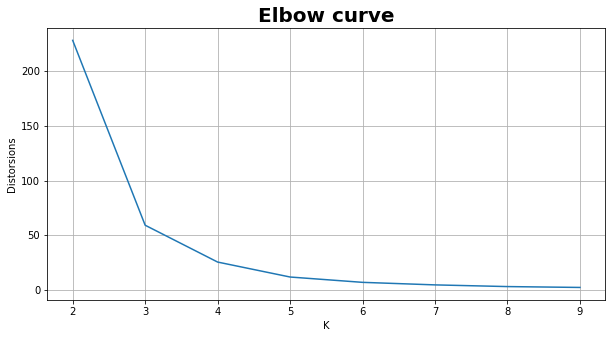

In [ ]:
distortion =[]
for k in range (2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_cl2)
    print(kmeans.inertia_)
    distortion.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(2,10),distortion)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title("Elbow curve",fontsize=20,fontweight="bold")

In [ ]:
from sklearn.metrics import silhouette_score 

for n_clusters in range(2,15):                                       # Checking the Performance for N samples
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df_cl2)
    silhouette_avg = silhouette_score(df_cl2, cluster_labels)
    print("For n_clusters =", n_clusters,"and The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 and The average silhouette_score is : 0.8012265867245364
For n_clusters = 3 and The average silhouette_score is : 0.8329078584549486
For n_clusters = 4 and The average silhouette_score is : 0.8554393178951697
For n_clusters = 5 and The average silhouette_score is : 0.8775164743970981
For n_clusters = 6 and The average silhouette_score is : 0.8886646176196016
For n_clusters = 7 and The average silhouette_score is : 0.8972194517378624
For n_clusters = 8 and The average silhouette_score is : 0.9024991999735
For n_clusters = 9 and The average silhouette_score is : 0.9132009489642402
For n_clusters = 10 and The average silhouette_score is : 0.91465888746616
For n_clusters = 11 and The average silhouette_score is : 0.9250126722439296
For n_clusters = 12 and The average silhouette_score is : 0.932484696476695
For n_clusters = 13 and The average silhouette_score is : 0.9365817789222624
For n_clusters = 14 and The average silhouette_score is : 0.9376549909249446


In [ ]:
kmeans=KMeans(n_clusters=5).fit(df_cl2)

In [ ]:
p=kmeans.predict(df_cl2)
p

array([1, 4, 0, ..., 2, 4, 0])

In [ ]:
#d.drop(d['kmeans_label'],axis = 1)

In [ ]:
d.insert(0, "kmeans_label", p, True)

In [ ]:
d.head(2)

,kmeans_label,Product_id,description,title,imUrl,salesRank,categories,price,related,brand,...,reviewTime,sentiment,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count
0,1,B001HSXTU2,Revlon Calcium Gel Nail Hardener instantly bon...,"Revlon Calcium Gel Nail Hardener, 0.5 Ounce",http://ecx.images-amazon.com/images/I/31lrZB5z...,33974,"[['Beauty', 'Skin Care', 'Hands & Nails', 'Nai...",7.49,"{'also_bought': ['B001KYW2OC', 'B004K0HEFA', '...",Revlon,...,2012-10-16,Negative,2,0,1.00,0.00,0.952,0.048,0.4019,60
1,4,B009DU4QYE,The Formula/Benefits: Safe and Effective Treat...,"Shampoo for Oily, Itchy &amp; Greasy Hair with...",http://ecx.images-amazon.com/images/I/31a9vMfc...,5126,"[['Beauty', 'Hair Care', 'Shampoos']]",18.00,"{'also_bought': ['B00B5S9CTG', 'B00L1KFQKC', '...",Maple Holistics,...,2013-07-19,Negative,1,3,0.25,0.12,0.823,0.057,-0.8013,96


In [ ]:
d.kmeans_label.value_counts()

0    5162
1    2088
2    1081
3    1038
4     631
Name: kmeans_label, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
d.columns

Index(['kmeans_label', 'Product_id', 'description', 'title', 'imUrl',
       'salesRank', 'categories', 'price', 'related', 'brand', 'reviewerID',
       'reviewerName', 'reviewText', 'overall', 'summary', 'unixReviewTime',
       'reviewTime', 'sentiment', 'Helpful', 'Not_helpful', 'helpful_rate',
       'neg', 'neu', 'pos', 'polarity', 'word_count'],
      dtype='object')

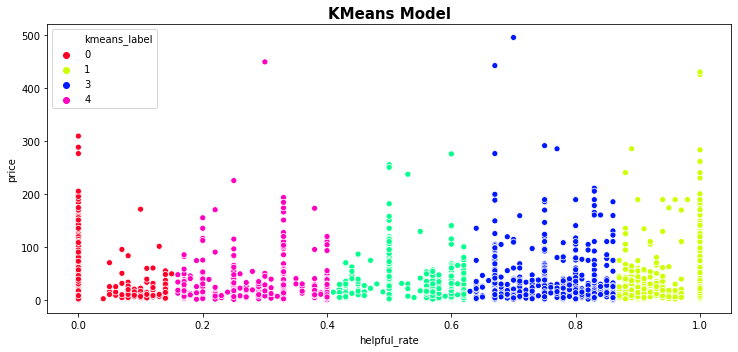

In [ ]:

plt.figure(figsize =(20,5))
plt.subplot(1,2,1)
plt.title('KMeans Model',fontweight='bold',fontsize=15)
sns.scatterplot(d['helpful_rate'],d['price'],hue=d['kmeans_label'],palette = 'gist_rainbow')


plt.tight_layout()
plt.show()

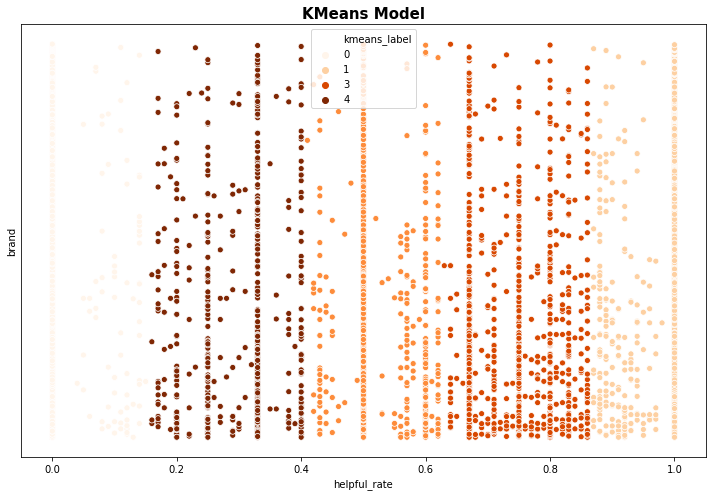

In [ ]:
plt.figure(figsize =(10,7))
plt.title('KMeans Model',fontweight='bold',fontsize=15)
sns.scatterplot(d['helpful_rate'],d['brand'],hue=d['kmeans_label'],palette = 'Oranges')
# disabling yticks by setting yticks to an empty list
plt.yticks([])
plt.tight_layout()
plt.show()

brands in each clusters represent the helpfulmess of the reviews
red and pink clusters are least helpful
green are somwhat helpful
blue and yellow are most helpful

In [ ]:
plt.figure(figsize =(10,7))
plt.title('KMeans Model',fontweight='bold',fontsize=15)
sns.scatterplot(d['helpful_rate'],d['Product_id'],hue=d['kmeans_label'],palette = 'gist_rainbow')
# disabling yticks by setting yticks to an empty list
plt.yticks([])
plt.tight_layout()
plt.show()

****************************************************************

In [ ]:
cust1=d[d["kmeans_label"]==0]
print('Brands of Cluster 0 =', len(cust1))
print( cust1["brand"].values)
print("--------------------------------------------------------------------------------------------")
cust2=d[d["kmeans_label"]==1]
print('Brands of Cluster 1 =', len(cust2))
print( cust2["brand"].values)

print("---------------------------------------------------------------------------------------------")
cust3=d[d["kmeans_label"]==2]
print('Brands of Cluster 2 =', len(cust3))
print( cust3["brand"].values)

print("---------------------------------------------------------------------------------------------")
cust4=d[d["kmeans_label"]==3]
print('Brands of Cluster 3 =', len(cust4))
print(cust4["brand"].values)

print("---------------------------------------------------------------------------------------------")
cust5=d[d["kmeans_label"]==4]
print('Brands of Cluster 4 =', len(cust5))
print( cust5["brand"].values)

print("---------------------------------------------------------------------------------------------")

Brands of Cluster 0 = 5162
['wwii101' 'Fusion Tools' 'Goody' ... 'Unknown' 'Clean Wellness Harmony'
 'Avalon Organics']
--------------------------------------------------------------------------------------------
Brands of Cluster 1 = 2088
['Revlon' 'La Mer' 'La Mer' ... 'Proactiv' 'Joico' 'Andis']
---------------------------------------------------------------------------------------------
Brands of Cluster 2 = 1081
['Montblanc' 'Kingmys' 'Solar Protection Formula' ... 'EnvyDerm'
 'Aztec Secret' 'HDE']
---------------------------------------------------------------------------------------------
Brands of Cluster 3 = 1038
['Izunami' 'ScarAway' 'Maybelline' ... 'Kirk&#39;s' 'HDE' 'Perricone MD']
---------------------------------------------------------------------------------------------
Brands of Cluster 4 = 631
['Maple Holistics' 'Keratin Research' 'Giovanni' 'Aqua Glycolic' 'Aveda'
 'WEN&reg; by Chaz Dean' 'Olay' 'Rogaine' 'Nioxin' 'Aztec Secret'
 'Pacific World Corp' '&#39;N Rage' '

In [ ]:
cust1=d[d["kmeans_label"]==0]
print('Product id of Cluster 0 =', len(cust1))
print( cust1["Product_id"].values)
print("--------------------------------------------------------------------------------------------")
cust2=d[d["kmeans_label"]==1]
print('Product id of Cluster 1 =', len(cust2))
print( cust2["Product_id"].values)

print("---------------------------------------------------------------------------------------------")
cust3=d[d["kmeans_label"]==2]
print('Product id of Cluster 2 =', len(cust3))
print( cust3["Product_id"].values)

print("---------------------------------------------------------------------------------------------")
cust4=d[d["kmeans_label"]==3]
print('Product id of Cluster 3 =', len(cust4))
print(cust4["Product_id"].values)

print("---------------------------------------------------------------------------------------------")
cust5=d[d["kmeans_label"]==4]
print('Product id of Cluster 4 =', len(cust5))
print( cust5["Product_id"].values)

print("---------------------------------------------------------------------------------------------")

Product id of Cluster 0 = 5162
['B00BPARRTQ' 'B001TAIMFA' 'B004S40W5W' ... 'B008PEXV3Q' 'B002XQ1R3S'
 'B0002JGU30']
--------------------------------------------------------------------------------------------
Product id of Cluster 1 = 2088
['B001HSXTU2' 'B0016PZY6S' 'B0012TCFBA' ... 'B003T75D9E' 'B003E11NE4'
 'B0018BXH1Y']
---------------------------------------------------------------------------------------------
Product id of Cluster 2 = 1081
['B0050EB0BE' 'B008GOR6O0' 'B00903JVSU' ... 'B003P904EA' 'B000ZMBSPE'
 'B002V9X78U']
---------------------------------------------------------------------------------------------
Product id of Cluster 3 = 1038
['B002QHFG3Q' 'B003DGWTXE' 'B00008MOQE' ... 'B000VD1UM8' 'B002V9X78U'
 'B003DQP0O4']
---------------------------------------------------------------------------------------------
Product id of Cluster 4 = 631
['B009DU4QYE' 'B00DHOET6W' 'B001VMQCMG' 'B000EBIDIQ' 'B004M6GTHQ'
 'B00188IFHS' 'B0000536P4' 'B0000Y8H3S' 'B00138XZNC' 'B000ZMBSPE'

In [ ]:

cust1=d[d["kmeans_label"]==0]
print('Title of Cluster 0 =', len(cust1))
print( cust1["title"].values)
print("--------------------------------------------------------------------------------------------")
cust2=d[d["kmeans_label"]==1]
print('Title of Cluster 1 =', len(cust2))
print( cust2["title"].values)

print("---------------------------------------------------------------------------------------------")
cust3=d[d["kmeans_label"]==2]
print('Title of Cluster 2 =', len(cust3))
print( cust3["title"].values)

print("---------------------------------------------------------------------------------------------")
cust4=d[d["kmeans_label"]==3]
print('Title of Cluster 3 =', len(cust4))
print(cust4["title"].values)

print("---------------------------------------------------------------------------------------------")
cust5=d[d["kmeans_label"]==4]
print('Title of Cluster 4 =', len(cust5))
print( cust5["title"].values)

print("---------------------------------------------------------------------------------------------")

Title of Cluster 0 = 5162
['Gorgeous Long Curly Clip-on Hair Extension Wigs - Black'
 'Fusion Tools, Gemstone Tourmaline Nanocomplex Salon Curling Iron, 0.75 Inches'
 'Goody Full Size Flare Hair Brush' ...
 'White Pearl Nail Art Stone Different Size Wheel Rhinestones Beads'
 'Clean Wellness Harmony for Women, Eau De Parfum Spray, 2.14 Ounce'
 'Avalon Organics Hand &amp; Body Lotion, Peppermint, 12 Ounce']
--------------------------------------------------------------------------------------------
Title of Cluster 1 = 2088
['Revlon Calcium Gel Nail Hardener, 0.5 Ounce'
 'La Mer Moisturizing Cream .24 oz / 7 ml FRESH NEW IN BOX (Travel Size)'
 'La Mer Creme de La Mer The Moisturizing Cream 60ml/2oz' ...
 'Proactiv Solution Refining Mask 2.5 Oz Set Of 5'
 'Joico JoiFix Firm Finishing Spray 10.1oz'
 'Elevate by Andis 30865 Professional Tourmaline Ionic Ceramic 1600 Watts Hair Dryer']
---------------------------------------------------------------------------------------------
Title of Clus

In [ ]:
cluster_df = d.groupby(['kmeans_label'],as_index=False).mean()

In [ ]:
cluster_df

,kmeans_label,salesRank,price,overall,unixReviewTime,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count
0,0,64886.329717,18.665496,1.0,1.375847e+09,0.023634,0.717551,0.001606,0.108692,0.806969,0.084334,-0.064067,53.200310
1,1,66140.471264,24.668443,1.0,1.358059e+09,4.532567,0.196360,0.990642,0.097459,0.815338,0.087202,-0.011208,74.131705
2,2,35869.530065,22.349343,1.0,1.347573e+09,2.696577,2.410731,0.516809,0.099035,0.814035,0.086920,-0.035176,77.732655
3,3,37792.112717,28.277938,1.0,1.340550e+09,7.767823,2.455684,0.737592,0.091738,0.819994,0.088261,0.012946,91.746628
4,4,38558.748019,25.937829,1.0,1.336880e+09,1.957211,4.870048,0.299509,0.101453,0.811136,0.087409,-0.045308,76.532488


In [ ]:
import seaborn as sb

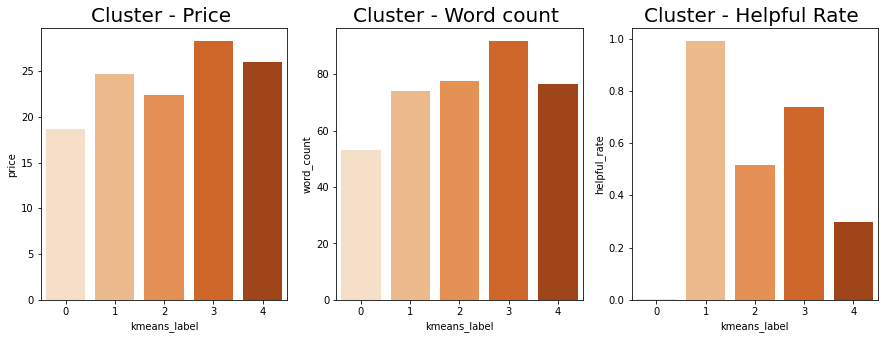

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Cluster - Price ',fontsize = 20 ,fontweight = 10 )
sb.barplot(x='kmeans_label',y='price',data=cluster_df,palette='Oranges')
plt.subplot(132)
plt.title('Cluster - Word count ',fontsize = 20 ,fontweight = 10 )
sb.barplot(x='kmeans_label',y='word_count',data=cluster_df,palette='Oranges')
plt.subplot(133)
plt.title('Cluster - Helpful Rate ',fontsize = 20 ,fontweight = 10 )
sb.barplot(x='kmeans_label',y='helpful_rate',data=cluster_df,palette='Oranges')
# plt.subplot(144)
# plt.title('Cluster - Helpful_rate ')
# sb.barplot(x='kmeans_label',y='helpful_rate',data=cluster_df,palette='Oranges')
plt.show()

**************************************